In [3]:
### Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as smf
import statsmodels.api         as sm
import scipy

!pip install linearmodels

from linearmodels import PanelOLS
from linearmodels import RandomEffects


In [4]:
datafinal = pd.read_csv('data-final-depurado-fecha-matricula.csv', encoding = "UTF-8")

C:\Users\margu\anaconda3\envs\case_1.2_var2\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (3,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
datafinal.columns

Index(['ESTU_TIPODOCUMENTO', 'ESTU_NACIONALIDAD', 'ESTU_GENERO',
       'ESTU_FECHANACIMIENTO', 'PERIODO', 'ESTU_CONSECUTIVO',
       'ESTU_ESTUDIANTE', 'ESTU_DEPTO_RESIDE', 'ESTU_COD_RESIDE_DEPTO',
       'ESTU_MCPIO_RESIDE', 'ESTU_COD_RESIDE_MCPIO', 'ESTU_COLE_TERMINO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_PAGOMATRICULABECA',
       'ESTU_PAGOMATRICULACREDITO', 'ESTU_PAGOMATRICULAPADRES',
       'ESTU_PAGOMATRICULAPROPIO', 'ESTU_SIMULACROTIPOICFES',
       'ESTU_ACTIVIDADREFUERZOAREAS', 'ESTU_ACTIVIDADREFUERZOGENERIC',
       'ESTU_TIPODOCUMENTOSB11', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_HORASSEMANATRABAJA',
       'INST_COD_INSTITUCION', 'INST_NOMBRE_INSTITUCION',
       'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_CODMUNICIPIO', 'ESTU_PRGM_MUNICIPIO',
       'ESTU_PRGM_DEPARTAMENTO', 'ESTU_NIVEL_PRGM_ACADEMICO',
       'ESTU_METODO_PRGM', 'E

In [6]:
datafinal.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA
0,CC,COLOMBIA,F,1994-11-24,20163,EK201630197609,ESTUDIANTE,CUNDINAMARCA,25.0,TABIO,...,155.0,A2,62.0,151.0,3,43.0,PUBLICAR,2016,SaberPro,Normal
1,CC,COLOMBIA,M,1991-06-11,20163,EK201630241417,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,153.0,A2,59.0,220.0,4,100.0,PUBLICAR,2016,SaberPro,Normal
2,CC,COLOMBIA,F,1995-02-22,20163,EK201630080363,ESTUDIANTE,NORTE SANTANDER,54.0,CUCUTA,...,120.0,-A1,16.0,162.0,3,72.0,PUBLICAR,2016,SaberPro,Normal
3,CC,COLOMBIA,M,1994-08-01,20163,EK201630081694,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,214.0,B2,98.0,112.0,1,8.0,PUBLICAR,2016,SaberPro,Normal
4,CC,COLOMBIA,M,1980-08-18,20163,EK201630079620,ESTUDIANTE,BOLIVAR,13.0,CARTAGENA,...,184.0,B1,84.0,158.0,3,53.0,PUBLICAR,2016,SaberPro,Normal


In [7]:
datafinal.shape

(1580574, 63)

In [8]:
datafinal.ESTU_NUCLEO_PREGRADO.value_counts()

ADMINISTRACIÓN                                           392549
CONTADURÍA PUBLICA                                       134828
EDUCACIÓN                                                101092
DERECHO Y AFINES                                          82072
INGENIERÍA INDUSTRIAL Y AFINES                            74988
INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES               72857
PSICOLOGÍA                                                58167
INGENIERÍA AMBIENTAL, SANITARIA Y AFINES                  51036
ECONOMÍA                                                  47229
SIN CLASIFICAR                                            45333
INGENIERÍA CIVIL Y AFINES                                 44463
INGENIERÍA MECÁNICA Y AFINES                              42008
COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES                  28928
DISEÑO                                                    28656
MEDICINA                                                  27065
INGENIERÍA ELECTRÓNICA, TELECOMUNICACION

In [9]:
datafinal.ESTU_NUCLEO_PREGRADO.unique()

array(['ADMINISTRACIÓN', 'PSICOLOGÍA', 'ENFERMERÍA',
       'INGENIERÍA QUÍMICA Y AFINES', 'EDUCACIÓN', 'ARQUITECTURA',
       'INGENIERÍA DE SISTEMAS, TELEMÁTICA Y AFINES',
       'COMUNICACIÓN SOCIAL, PERIODISMO Y AFINES',
       'INGENIERÍA ADMINISTRATIVA Y AFINES',
       'INGENIERÍA BIOMÉDICA Y AFINES', 'INGENIERÍA INDUSTRIAL Y AFINES',
       'INGENIERÍA AMBIENTAL, SANITARIA Y AFINES', 'DISEÑO',
       'ARTES PLÁSTICAS, VISUALES Y AFINES', 'QUÍMICA Y AFINES',
       'INGENIERÍA ELECTRÓNICA, TELECOMUNICACIONES Y AFINES', ' ',
       'INGENIERÍA CIVIL Y AFINES', 'CONTADURÍA PUBLICA', 'TERAPIAS',
       'MEDICINA', 'ECONOMÍA', 'INGENIERÍA MECÁNICA Y AFINES',
       'SIN ESPECIFICAR',
       'GEOLOGÍA, OTROS PROGRAMAS DE CIENCIAS NATURALES',
       'DERECHO Y AFINES', 'INGENIERÍA ELÉCTRICA Y AFINES',
       'INGENIERÍA AGRONÓMICA, PECUARIA Y AFINES',
       'SOCIOLOGÍA, TRABAJO SOCIAL Y AFINES',
       'FORMACIÓN RELACIONADA CON EL CAMPO MILITAR O POLICIAL',
       'BIBLIOTECOLOGÍA, 

In [10]:
datafinal[datafinal['PRUEBA']=='SaberTyT']['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts()

No pagó matrícula                           289796
Entre 1 millón y menos de 2.5 millones      137030
Entre 500 mil y menos de 1 millón            77763
Menos de 500 mil                             36331
Entre 2.5 millones y menos de 4 millones     23157
Entre 4 millones y menos de 5.5 millones      1512
Entre 5.5 millones y menos de 7 millones      1216
Más de 7 millones                              496
Name: ESTU_VALORMATRICULAUNIVERSIDAD, dtype: int64

In [9]:
for column in datafinal.columns:
    print(f'Column: {column}')
    print(datafinal[column].astype(str).sort_values().value_counts())
    print('\n')

Column: ESTU_TIPODOCUMENTO
CC     1549899
TI       25716
CR        2659
CE        1961
PE         267
PC          66
PEP          3
NES          2
V            1
Name: ESTU_TIPODOCUMENTO, dtype: int64


Column: ESTU_NACIONALIDAD
COLOMBIA          1578117
VENEZUELA             827
ESTADOS UNIDOS        219
ECUADOR               170
FRANCIA               156
                   ...   
VANUATU                 1
AUSTRALIA               1
NAMIBIA                 1
ANGUILA                 1
JAMAICA                 1
Name: ESTU_NACIONALIDAD, Length: 92, dtype: int64


Column: ESTU_GENERO
F      897579
M      682608
nan       387
Name: ESTU_GENERO, dtype: int64


Column: ESTU_FECHANACIMIENTO
nan                    197752
1900-01-01                763
1995-10-10                476
1994-11-08                467
1995-08-09                466
                        ...  
1996-05-15 00:00:00         1
1952-09-04 12:00:00         1
1956-12-27                  1
1960-09-15                  1
1966-11-

No     1105436
Si      439630
nan      35508
Name: FAMI_TIENEAUTOMOVIL, dtype: int64


Column: ESTU_HORASSEMANATRABAJA
Más de 30 horas        593901
0                      338294
Entre 11 y 20 horas    227701
Menos de 10 horas      175706
Entre 21 y 30 horas    156566
nan                     88406
Name: ESTU_HORASSEMANATRABAJA, dtype: int64


Column: INST_COD_INSTITUCION
9110     338617
2829      70701
4813      49505
2725      36017
2102      27067
          ...  
33472        10
10041        10
3116          9
4705          4
19109         3
Name: INST_COD_INSTITUCION, Length: 430, dtype: int64


Column: INST_NOMBRE_INSTITUCION
SERVICIO NACIONAL DE APRENDIZAJE-SENA                                                              271650
CORPORACION UNIVERSITARIA MINUTO DE DIOS -UNIMINUTO-BOGOTÁ D.C.                                     70701
SERVICIO NACIONAL DE APRENDIZAJE-SENA-BOGOTÁ D.C.                                                   66967
CORPORACION UNIFICADA NACIONAL DE EDUCACION 

11001.0    885005
5001.0     127343
8001.0      70467
76001.0     67798
68001.0     57281
            ...  
5002.0         17
8436.0         17
5670.0         13
41306.0        10
91001.0         3
Name: ESTU_INST_CODMUNICIPIO, Length: 146, dtype: int64


Column: ESTU_INST_MUNICIPIO
BOGOTA          885005
MEDELLÍN         94540
BARRANQUILLA     70467
CALI             67798
BUCARAMANGA      57281
                 ...  
JERICO               8
JUNÍN                7
SABOYA               6
MALAGA               5
LETICIA              3
Name: ESTU_INST_MUNICIPIO, Length: 188, dtype: int64


Column: ESTU_INST_DEPARTAMENTO
BOGOTA             885005
ANTIOQUIA          145160
VALLE               78981
ATLANTICO           74935
SANTANDER           64799
BOLIVAR             44732
NORTE SANTANDER     28962
TOLIMA              27389
CALDAS              25414
BOYACA              23372
CUNDINAMARCA        20450
RISARALDA           20003
NARIÑO              18648
QUINDIO             17318
CAUCA        

In [11]:
datafinal['ESTU_PRGM_DEPARTAMENTO']=datafinal['ESTU_PRGM_DEPARTAMENTO'].replace('BOGOTÁ','BOGOTA')

In [12]:
datafinal['ESTU_PRGM_DEPARTAMENTO'].value_counts()

BOGOTA             635425
ANTIOQUIA          198452
VALLE              108169
ATLANTICO           84050
SANTANDER           75586
BOLIVAR             53551
CUNDINAMARCA        42088
NORTE SANTANDER     40053
TOLIMA              33752
CALDAS              32254
BOYACA              31549
RISARALDA           26951
CAUCA               25393
NARIÑO              23597
HUILA               21358
MAGDALENA           20461
CORDOBA             20365
QUINDIO             20361
META                18345
SUCRE               17461
CESAR               15730
LA GUAJIRA          11517
CHOCO                6471
CASANARE             5243
CAQUETA              4846
PUTUMAYO             3939
ARAUCA               1452
GUAVIARE              752
SAN ANDRES            711
GUAINIA               264
VICHADA               246
AMAZONAS              129
VAUPES                 53
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

In [13]:
datafinal['TIPO_PRUEBA'].unique()

array(['Normal', 'Exterior', 'Extemporaneo'], dtype=object)

In [11]:
# Let's filter the nan values for the column ESTU_VALORMATRICULAUNIVERSIDAD
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_VALORMATRICULAUNIVERSIDAD']=='nan') | (datafinal['ESTU_VALORMATRICULAUNIVERSIDAD']=='-')].index)
datafinal=datafinal.dropna(subset=['ESTU_VALORMATRICULAUNIVERSIDAD'])
datafinal['ESTU_VALORMATRICULAUNIVERSIDAD'].unique()

array(['Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Más de 7 millones',
       'Entre 5.5 millones y menos de 7 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Menos de 500 mil',
       'No pagó matrícula', 'Entre 2.5 millones y menos de 4 millones'],
      dtype=object)

In [12]:
datafinal.shape

(1516132, 63)

In [13]:
datafinal=datafinal.dropna(subset=['ESTU_PAGOMATRICULABECA','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULAPADRES',\
                                    'ESTU_PAGOMATRICULAPROPIO','ESTU_SIMULACROTIPOICFES','ESTU_ACTIVIDADREFUERZOAREAS',\
                                    'ESTU_TIPODOCUMENTOSB11','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE',\
                                    'FAMI_ESTRATOVIVIENDA','FAMI_TIENEINTERNET','FAMI_TIENECOMPUTADOR',\
                                    'FAMI_TIENELAVADORA','FAMI_TIENEAUTOMOVIL','ESTU_HORASSEMANATRABAJA',\
                                    'MOD_RAZONA_CUANTITATIVO_PNAL'])

In [14]:
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULABECA']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULACREDITO']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULAPADRES']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_PAGOMATRICULAPROPIO']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_SIMULACROTIPOICFES']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_SIMULACROTIPOICFES']=='-')].index)
datafinal = datafinal.drop(datafinal[(datafinal['ESTU_ACTIVIDADREFUERZOAREAS']=='-')].index)

In [15]:
datafinal.shape

(127139, 63)

In [16]:
datafinal['PRUEBA'].value_counts()

SaberPro    78638
SaberTyT    48501
Name: PRUEBA, dtype: int64

In [17]:
datafinal['PERIODO-X'].value_counts()

2019     26400
2018     18231
2017     17868
2016     16139
20161     7783
20172     7181
20191     7158
20162     7100
20192     6738
20181     5587
20182     4776
20171     2178
Name: PERIODO-X, dtype: int64

In [18]:
datafinal[datafinal['PRUEBA']=='SaberTyT']['ESTU_NACIONALIDAD'].value_counts()

COLOMBIA                  48460
VENEZUELA                    15
PANAMÁ                        3
ESTADOS UNIDOS                3
ECUADOR                       2
COREA DEL NORTE               2
COMORAS                       2
TERRITORIOS PALESTINOS        2
BOLIVIA                       2
ESPAÑA                        2
ALAND                         1
CANADÁ                        1
CIUDAD DEL VATICANO           1
PORTUGAL                      1
COSTA DE MARFIL               1
REPÚBLICA DOMINICANA          1
HAITI                         1
COSTA RICA                    1
Name: ESTU_NACIONALIDAD, dtype: int64

**TYT + TODOS LOS PERIODOS + COLOMBIANOS**

In [19]:
# Filter by the two conditions
df_sabertyt=datafinal[(datafinal['PRUEBA']=='SaberTyT')&((datafinal['PERIODO-X']==20161)|(datafinal['PERIODO-X']==20162)\
                    |(datafinal['PERIODO-X']==20171)|(datafinal['PERIODO-X']==20172)\
                    |(datafinal['PERIODO-X']==20181)|(datafinal['PERIODO-X']==20182)\
                    |(datafinal['PERIODO-X']==20191)|(datafinal['PERIODO-X']==20192))\
                    &(datafinal['ESTU_NACIONALIDAD']=='COLOMBIA')]
len(df_sabertyt)

48460

In [20]:
# Decision Tree Regresison

import pandas as pd
import pydotplus
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import chi2_contingency, norm
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sympy import var, plot_implicit, Eq

**MOD_RAZONA_CUANTITAT_PUNT**

In [21]:
df_sabertyt['group_CUANTITATIVO'] = pd.cut(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

<ipython-input-21-3cda9fd83d6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt['group_CUANTITATIVO'] = pd.cut(df_sabertyt['MOD_RAZONA_CUANTITAT_PUNT'],


In [22]:
df_sabertyt.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
955354,CC,COLOMBIA,F,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955379,CC,COLOMBIA,F,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955390,CC,COLOMBIA,F,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955395,CC,COLOMBIA,M,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955398,CC,COLOMBIA,F,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,...,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3


In [23]:
df_sabertyt.group_CUANTITATIVO.value_counts()

Q1    12801
Q3    11939
Q2    11918
Q4    11798
Name: group_CUANTITATIVO, dtype: int64

In [24]:
df_sabertyt["group_CUANTITATIVO"] = df_sabertyt["group_CUANTITATIVO"].astype('category')
df_sabertyt["ESTU_GENERO"] = df_sabertyt["ESTU_GENERO"].astype('category')
df_sabertyt["INST_ORIGEN"] = df_sabertyt["INST_ORIGEN"].astype('category')
df_sabertyt["FAMI_TIENEAUTOMOVIL"] = df_sabertyt["FAMI_TIENEAUTOMOVIL"].astype('category')
df_sabertyt["FAMI_TIENELAVADORA"] = df_sabertyt["FAMI_TIENELAVADORA"].astype('category')
df_sabertyt["FAMI_TIENECOMPUTADOR"] = df_sabertyt["FAMI_TIENECOMPUTADOR"].astype('category')
df_sabertyt["FAMI_TIENEINTERNET"] = df_sabertyt["FAMI_TIENEINTERNET"].astype('category')
df_sabertyt["FAMI_ESTRATOVIVIENDA"] = df_sabertyt["FAMI_ESTRATOVIVIENDA"].astype('category')
df_sabertyt["FAMI_EDUCACIONMADRE"] = df_sabertyt["FAMI_EDUCACIONMADRE"].astype('category')
df_sabertyt["FAMI_EDUCACIONPADRE"] = df_sabertyt["FAMI_EDUCACIONPADRE"].astype('category')
df_sabertyt["ESTU_METODO_PRGM"] = df_sabertyt["ESTU_METODO_PRGM"].astype('category')
df_sabertyt["INST_CARACTER_ACADEMICO"] = df_sabertyt["INST_CARACTER_ACADEMICO"].astype('category')
df_sabertyt["ESTU_HORASSEMANATRABAJA"] = df_sabertyt["ESTU_HORASSEMANATRABAJA"].astype('category')
df_sabertyt["ESTU_ACTIVIDADREFUERZOGENERIC"] = df_sabertyt["ESTU_ACTIVIDADREFUERZOGENERIC"].astype('category')
df_sabertyt["ESTU_ACTIVIDADREFUERZOAREAS"] = df_sabertyt["ESTU_ACTIVIDADREFUERZOAREAS"].astype('category')
df_sabertyt["ESTU_SIMULACROTIPOICFES"] = df_sabertyt["ESTU_SIMULACROTIPOICFES"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULAPROPIO"] = df_sabertyt["ESTU_PAGOMATRICULAPROPIO"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULAPADRES"] = df_sabertyt["ESTU_PAGOMATRICULAPADRES"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULACREDITO"] = df_sabertyt["ESTU_PAGOMATRICULACREDITO"].astype('category')
df_sabertyt["ESTU_PAGOMATRICULABECA"] = df_sabertyt["ESTU_PAGOMATRICULABECA"].astype('category')
df_sabertyt["ESTU_VALORMATRICULAUNIVERSIDAD"] = df_sabertyt["ESTU_VALORMATRICULAUNIVERSIDAD"].astype('category')
df_sabertyt["ESTU_NUCLEO_PREGRADO"] = df_sabertyt["ESTU_NUCLEO_PREGRADO"].astype('category')
df_sabertyt["ESTU_PRGM_DEPARTAMENTO"] = df_sabertyt["ESTU_PRGM_DEPARTAMENTO"].astype('category')
df_sabertyt["PERIODO-X"] = df_sabertyt["PERIODO-X"].astype('category')

<ipython-input-24-39cc2f0721c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt["group_CUANTITATIVO"] = df_sabertyt["group_CUANTITATIVO"].astype('category')
<ipython-input-24-39cc2f0721c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sabertyt["ESTU_GENERO"] = df_sabertyt["ESTU_GENERO"].astype('category')
<ipython-input-24-39cc2f0721c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [25]:
df_sabertyt.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
955354,CC,COLOMBIA,F,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955379,CC,COLOMBIA,F,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955390,CC,COLOMBIA,F,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955395,CC,COLOMBIA,M,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955398,CC,COLOMBIA,F,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,...,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3


In [26]:
df_sabertyt=df_sabertyt.dropna(subset=['group_CUANTITATIVO'])

In [27]:
df_sabertyt.shape

(48456, 64)

In [28]:
df_sabertyt.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
955354,CC,COLOMBIA,F,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955379,CC,COLOMBIA,F,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955390,CC,COLOMBIA,F,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955395,CC,COLOMBIA,M,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955398,CC,COLOMBIA,F,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,...,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3


In [29]:
df_t=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t[var]=df_t[var].cat.codes

In [30]:
with pd.option_context('display.max_columns',500):
    display(df_t.head())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
955354,CC,COLOMBIA,0,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,4,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955379,CC,COLOMBIA,0,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,0,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,BOGOTA,3,TÉCNICO PROFESIONAL,2,31,11001.0,BOGOTA,BOGOTA,3,0,11001,BOGOTÁ,BOGOTA,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955390,CC,COLOMBIA,0,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,0,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,33,11001.0,BOGOTA,BOGOTA,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955395,CC,COLOMBIA,1,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,4,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,31,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955398,CC,COLOMBIA,0,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,15001.0,COLEGIO REAL DE MARES,0,0,0,0,1,0,0,0,CC,7,9,3,1,1,1,1,1,1106,UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMB...,TÉCNICA PROFESIONAL EN PROCESOS COMERCIALES Y ...,15001,TUNJA,5,TÉCNICO PROFESIONAL,1,47,15001.0,TUNJA,BOYACA,4,4,15001,TUNJA,BOYACA,15,153.0,54.0,193.5,92.0,180.0,84.0,159.0,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3


In [40]:
# That's just for classification
#clf = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 10,  min_samples_split = 100, min_samples_leaf = 5, max_features = 10)
#clf=DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth = 10)
#clf = RandomForestClassifier(criterion = "entropy",  max_depth = 10,  min_samples_split = 1000,min_samples_leaf = 20, max_features = 10)
#clf_new =RandomForestClassifier(criterion = "entropy", max_depth = 12, max_features = 4)

In [31]:
# Train Decision Tree Classifer
covariates=['ESTU_GENERO','INST_ORIGEN','FAMI_ESTRATOVIVIENDA',\
            'ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO',\
            'ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']

In [32]:
len(covariates)

8

In [33]:
# Metricas

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

**CROSS VALIDATION FOR THE PARAMETRES OF RANDOM FOREST**

In [34]:
# Cross validation for the parameters is not too easy 
n_estimators=[10,20,30,40,50,60,70,80,90,100] # Number of decision trees
max_features=["auto","sqrt","log2"] # Number of features to resample higher better but careful with overfit
max_depth=[3,4,5,6,7,8,9,10] # Careful with overfit with higher values represent the splits
min_samples_split=[2,5,10,15,20] # Minimum number of samples to make a split large value underfit 
min_samples_leaf=[1,2,5,10,15] #Paramter to stop the growth of trees once a minimum number of samples per split is reached. this value depends of the size of the training dataste


In [35]:
# Set up a dictionary for the candidate hyperparameters
grid_param={"n_estimators":n_estimators,
           "max_features":max_features,
           "max_depth": max_depth,
           "min_samples_split": min_samples_split,
           "min_samples_leaf": min_samples_leaf}


In [36]:
# randomly sample a specified number of possible candidate models. This is possible using scikit-learn’s function “RandomizedSearchCV”
from sklearn.model_selection import RandomizedSearchCV
RFR=RandomForestRegressor(random_state=1)
RFR


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [37]:
# The number of folds for cross validation cv=5
RFR_random=RandomizedSearchCV(estimator=RFR, param_distributions=grid_param, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


**INICIA FIT PARA CADA MODULO**

MOD_RAZONA_CUANTITAT_PUNT

In [44]:
# Fit the RandomizedSearchCV with the features and labels
RFR_random.fit(df_t[covariates],df_t['MOD_RAZONA_CUANTITAT_PUNT'])


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 14.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_t[covariates],
                                                    df_t['MOD_RAZONA_CUANTITAT_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [39]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (36342, 8)
X_test shape:  (12114, 8)
y_train shape:  (36342,)
y_test shape:  (12114,)


In [40]:
X_train

,ESTU_GENERO,INST_ORIGEN,FAMI_ESTRATOVIVIENDA,ESTU_METODO_PRGM,INST_CARACTER_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO
1263721,1,4,1,0,1,7,3,1
1497680,1,4,1,2,1,7,28,34
1529555,0,4,3,2,1,7,0,1
1283353,0,4,3,0,1,7,3,1
1570253,1,4,2,2,1,7,28,1
...,...,...,...,...,...,...,...,...
1387511,1,4,1,2,1,7,3,47
1210568,1,4,2,2,2,4,3,7
1276771,1,4,2,2,2,4,26,-1
1403325,0,4,2,2,1,7,13,1


In [41]:
X_test

,ESTU_GENERO,INST_ORIGEN,FAMI_ESTRATOVIVIENDA,ESTU_METODO_PRGM,INST_CARACTER_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PRGM_DEPARTAMENTO,ESTU_NUCLEO_PREGRADO
1217427,1,4,2,2,1,4,4,1
1057916,1,1,2,2,1,0,3,33
1133623,0,1,1,0,1,0,2,-1
1079821,0,4,2,2,1,7,16,48
1356879,0,2,1,2,4,4,18,1
...,...,...,...,...,...,...,...,...
1445262,1,4,2,2,1,7,3,34
1576944,1,4,1,2,2,0,13,18
1319548,1,1,3,2,3,5,3,1
1556137,1,4,2,2,2,0,2,18


In [45]:
# Finally after the iterations and the number of cross validation folds print best parameters
print(RFR_random.best_params_)


{'n_estimators': 30, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 10}


In [42]:
# Create the Regression model with Random Forest - BEST Parametros 
RandomforestRegModel= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=10,max_features='log2',\
                                           min_samples_split=20, min_samples_leaf=5,\
                                           n_estimators=30)


In [43]:
# Train the model
RandomforestRegModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
# Create the Regression model with Random Forest
#RandomforestRegModel= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
#RandomforestRegModel.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred=RandomforestRegModel.predict(X_test)

In [45]:
y_pred

array([134.49196634, 160.8724027 , 130.55169768, ..., 146.9835863 ,
       117.24168063, 122.76700589])

In [46]:
y_test

1217427     97.5
1057916    157.5
1133623    172.5
1079821    169.5
1356879    160.5
           ...  
1445262    189.0
1576944     75.0
1319548    109.5
1556137     91.5
1536880     76.5
Name: MOD_RAZONA_CUANTITAT_PUNT, Length: 12114, dtype: float64

In [47]:
#MOD_RAZONA_CUANTITAT_PUNT
comparar=pd.DataFrame(y_pred, y_test)
comparar.head(20)

,0
MOD_RAZONA_CUANTITAT_PUNT,
97.5,134.491966
157.5,160.872403
172.5,130.551698
169.5,131.695025
160.5,129.209682
123.0,144.495334
126.0,131.720496
150.0,141.595953
114.0,126.216245


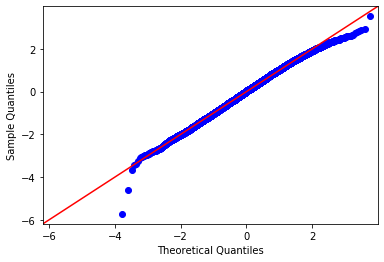

In [48]:
import statsmodels.api as sm
res = y_pred-y_test # residuals
#print(res)
fig=sm.qqplot(res,fit=True, line='45')

In [54]:
#Evaluate the Random forest regression model

In [49]:
def MAE(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

In [50]:
def RMSE(prediction,true_values):
    
    return np.sqrt(                                                          # Root
            np.mean(                                                      # Mean
                np.square(                                                # Squared
                         prediction-true_values                           # Error
                )
            )
        )

In [51]:
def MAPE(prediction,true_value):
    return np.mean(                                           # Mean
        np.abs(                                               # Absolute
               (prediction-true_value)/true_value             # Error
            )*100                                            # Percentage
    )

In [52]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model RAZON CUANTI', MAE(y_pred,y_test))
print('RMSE of the model RAZON CUANTI', RMSE(y_pred,y_test))
print('MAPE of the model RAZON CUANTI', MAPE(y_pred,y_test))
print('Accuracy of the model RAZON CUANTI', 100-MAPE(y_pred,y_test))



MAE of the model RAZON CUANTI 23.845652001857104
RMSE of the model RAZON CUANTI 29.51584862214428
MAPE of the model RAZON CUANTI 19.28293500329956
Accuracy of the model RAZON CUANTI 80.71706499670044


In [53]:
# Important variables

feature_list= list(df_t[covariates].columns)
# Get numerical feature importances
importances = list(RandomforestRegModel.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_RAZONA_CUANTITAT_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

MOD_RAZONA_CUANTITAT_PUNT

Variable: INST_ORIGEN          Importance: 0.3
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.21
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.13
Variable: ESTU_GENERO          Importance: 0.09
Variable: INST_CARACTER_ACADEMICO Importance: 0.09
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.08
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.08
Variable: ESTU_METODO_PRGM     Importance: 0.02


**QUANTILES**

In [54]:
df_sabertyt

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO
955354,CC,COLOMBIA,F,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,...,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955379,CC,COLOMBIA,F,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955390,CC,COLOMBIA,F,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,...,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4
955395,CC,COLOMBIA,M,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,...,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3
955398,CC,COLOMBIA,F,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,...,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580568,CC,COLOMBIA,M,1996-05-28 12:00:00,20195,EK201950042257,ESTUDIANTE,BOYACA,15.0,SANTA ROSA DE VITERBO,...,A1,45.0,108.0,1,6.0,PUBLICAR,20192,SaberTyT,Normal,Q3
1580569,CC,COLOMBIA,M,1998-10-04 12:00:00,20195,EK201950042514,ESTUDIANTE,BOYACA,15.0,SANTA ROSA DE VITERBO,...,A2,86.0,220.5,4,92.0,PUBLICAR,20192,SaberTyT,Normal,Q3
1580570,CC,COLOMBIA,M,1999-06-19 12:00:00,20195,EK201950044146,ESTUDIANTE,BOYACA,15.0,SANTA ROSA DE VITERBO,...,-A1,21.0,205.5,4,90.0,PUBLICAR,20192,SaberTyT,Normal,Q1
1580571,CC,COLOMBIA,M,1998-10-08 12:00:00,20195,EK201950042208,ESTUDIANTE,BOYACA,15.0,SANTA MARIA,...,A2,65.0,151.5,2,40.0,PUBLICAR,20192,SaberTyT,Normal,Q4


In [55]:
df_sabertyt['group_LECTURA'] = pd.cut(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_LECTURA_CRITICA_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

In [56]:
df_sabertyt['group_COMPETENCIA'] = pd.cut(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_COMPETEN_CIUDADA_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

In [57]:
df_sabertyt['group_INGLES'] = pd.cut(df_sabertyt['MOD_INGLES_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_INGLES_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_INGLES_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_INGLES_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_INGLES_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

In [58]:
df_sabertyt['group_ESCRITA'] = pd.cut(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],
                     bins=[0, np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],0.25 ), np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],0.5 ),\
                           np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],0.75 ), np.quantile(df_sabertyt['MOD_COMUNI_ESCRITA_PUNT'],1 )],
                     labels=["Q1", "Q2", "Q3", "Q4"])

In [59]:
df_sabertyt

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
955354,CC,COLOMBIA,F,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,...,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q3,Q3,Q1,Q3
955379,CC,COLOMBIA,F,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
955390,CC,COLOMBIA,F,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,...,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q3,Q4,Q3
955395,CC,COLOMBIA,M,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,...,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
955398,CC,COLOMBIA,F,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,...,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q3,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580568,CC,COLOMBIA,M,1996-05-28 12:00:00,20195,EK201950042257,ESTUDIANTE,BOYACA,15.0,SANTA ROSA DE VITERBO,...,6.0,PUBLICAR,20192,SaberTyT,Normal,Q3,Q2,Q4,Q2,Q1
1580569,CC,COLOMBIA,M,1998-10-04 12:00:00,20195,EK201950042514,ESTUDIANTE,BOYACA,15.0,SANTA ROSA DE VITERBO,...,92.0,PUBLICAR,20192,SaberTyT,Normal,Q3,Q2,Q1,Q4,Q4
1580570,CC,COLOMBIA,M,1999-06-19 12:00:00,20195,EK201950044146,ESTUDIANTE,BOYACA,15.0,SANTA ROSA DE VITERBO,...,90.0,PUBLICAR,20192,SaberTyT,Normal,Q1,Q2,Q3,Q1,Q4
1580571,CC,COLOMBIA,M,1998-10-08 12:00:00,20195,EK201950042208,ESTUDIANTE,BOYACA,15.0,SANTA MARIA,...,40.0,PUBLICAR,20192,SaberTyT,Normal,Q4,Q4,Q4,Q3,Q2


In [60]:
df_sabertyt["group_LECTURA"] = df_sabertyt["group_LECTURA"].astype('category')
df_sabertyt["group_COMPETENCIA"] = df_sabertyt["group_COMPETENCIA"].astype('category')
df_sabertyt["group_INGLES"] = df_sabertyt["group_INGLES"].astype('category')
df_sabertyt["group_ESCRITA"] = df_sabertyt["group_ESCRITA"].astype('category')

In [61]:
df_sabertyt.dtypes

ESTU_TIPODOCUMENTO        object
ESTU_NACIONALIDAD         object
ESTU_GENERO             category
ESTU_FECHANACIMIENTO      object
PERIODO                    int64
                          ...   
group_CUANTITATIVO      category
group_LECTURA           category
group_COMPETENCIA       category
group_INGLES            category
group_ESCRITA           category
Length: 68, dtype: object

In [62]:
df_sabertyt.shape

(48456, 68)

In [63]:
df_sabertyt=df_sabertyt.dropna(subset=['group_LECTURA'])

In [64]:
df_sabertyt.shape

(48453, 68)

In [65]:
df_sabertyt=df_sabertyt.dropna(subset=['group_COMPETENCIA'])

In [66]:
df_sabertyt.shape

(48445, 68)

In [67]:
df_sabertyt=df_sabertyt.dropna(subset=['group_INGLES'])

In [68]:
df_sabertyt.shape

(48396, 68)

In [69]:
df_sabertyt=df_sabertyt.dropna(subset=['group_ESCRITA'])

In [70]:
df_sabertyt.shape

(48111, 68)

**MOD_LECTURA_CRITICA_PUNT**

In [71]:
df_sabertyt.head()

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,...,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
955354,CC,COLOMBIA,F,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,...,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q3,Q3,Q1,Q3
955379,CC,COLOMBIA,F,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,...,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
955390,CC,COLOMBIA,F,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,...,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q3,Q4,Q3
955395,CC,COLOMBIA,M,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,...,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
955398,CC,COLOMBIA,F,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,...,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q3,Q3


In [72]:
df_t_lectura=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_lectura[var]=df_t_lectura[var].cat.codes

In [73]:
with pd.option_context('display.max_columns',500):
    display(df_t_lectura.head())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
955354,CC,COLOMBIA,0,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,4,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q3,Q3,Q1,Q3
955379,CC,COLOMBIA,0,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,0,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,BOGOTA,3,TÉCNICO PROFESIONAL,2,31,11001.0,BOGOTA,BOGOTA,3,0,11001,BOGOTÁ,BOGOTA,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
955390,CC,COLOMBIA,0,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,0,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,33,11001.0,BOGOTA,BOGOTA,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q3,Q4,Q3
955395,CC,COLOMBIA,1,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,4,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,31,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
955398,CC,COLOMBIA,0,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,15001.0,COLEGIO REAL DE MARES,0,0,0,0,1,0,0,0,CC,7,9,3,1,1,1,1,1,1106,UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMB...,TÉCNICA PROFESIONAL EN PROCESOS COMERCIALES Y ...,15001,TUNJA,5,TÉCNICO PROFESIONAL,1,47,15001.0,TUNJA,BOYACA,4,4,15001,TUNJA,BOYACA,15,153.0,54.0,193.5,92.0,180.0,84.0,159.0,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q3,Q3


In [74]:
RFR_lect=RandomForestRegressor(random_state=1)
RFR_lect

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [75]:
# The number of folds for cross validation cv=5
RFR_random_lect=RandomizedSearchCV(estimator=RFR_lect, param_distributions=grid_param, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [84]:
# Fit the RandomizedSearchCV with the features and labels
RFR_random_lect.fit(df_t_lectura[covariates],df_t_lectura['MOD_LECTURA_CRITICA_PUNT'])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 15.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [76]:
X_train_lect, X_test_lect, y_train_lect, y_test_lect = train_test_split(df_t_lectura[covariates],
                                                    df_t_lectura['MOD_LECTURA_CRITICA_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [77]:
print('X_train_lect shape: ', X_train_lect.shape)
print('X_test_lect shape: ', X_test_lect.shape)
print('y_train_lect shape: ', y_train_lect.shape)
print('y_test_lect shape: ', y_test_lect.shape)

X_train_lect shape:  (36083, 8)
X_test_lect shape:  (12028, 8)
y_train_lect shape:  (36083,)
y_test_lect shape:  (12028,)


In [87]:
# Finally after the iterations and the number of cross validation folds print best parameters
print(RFR_random_lect.best_params_)

{'n_estimators': 30, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10}


In [78]:
# Create the Regression model with Random Forest - BEST Parametros 
RandomforestRegModel_lectura= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=10,max_features='sqrt',\
                                           min_samples_split=20, min_samples_leaf=10,\
                                           n_estimators=30)
# Train the model
RandomforestRegModel_lectura.fit(X_train_lect, y_train_lect)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
# Create the Regression model with Random Forest
#RandomforestRegModel_lectura= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
#RandomforestRegModel_lectura.fit(X_train_lect, y_train_lect)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
y_pred_lect=RandomforestRegModel_lectura.predict(X_test_lect)

In [80]:
#MOD_LECTURA_CRITICA_PUNT
comparar_lect=pd.DataFrame(y_pred_lect, y_test_lect)
comparar_lect.head(20)

,0
MOD_LECTURA_CRITICA_PUNT,
108.0,140.232865
186.0,159.789375
190.5,142.397505
147.0,155.544351
103.5,145.307978
97.5,130.407078
96.0,131.196170
160.5,146.348538
61.5,134.226009


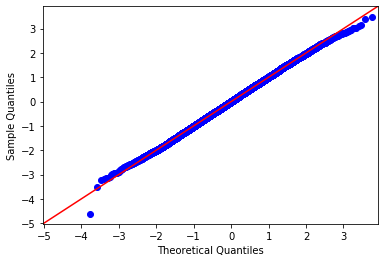

In [81]:
res_lect = y_pred_lect-y_test_lect # residuals
#print(res)
fig=sm.qqplot(res_lect,fit=True, line='45')

In [82]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model LECTURA', MAE(y_pred_lect,y_test_lect))
print('RMSE of the model LECTURA', RMSE(y_pred_lect,y_test_lect))
print('MAPE of the model LECTURA', MAPE(y_pred_lect,y_test_lect))
print('Accuracy of the model LECTURA', 100-MAPE(y_pred_lect,y_test_lect))



MAE of the model LECTURA 24.453851198197153
RMSE of the model LECTURA 30.42271857714921
MAPE of the model LECTURA 18.75071478898924
Accuracy of the model LECTURA 81.24928521101076


In [83]:
# Important variables

feature_list_lectura= list(df_t_lectura[covariates].columns)
# Get numerical feature importances
importances_lectura = list(RandomforestRegModel_lectura.feature_importances_)
# List of tuples with variable and importance
feature_importances_lectura = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_lectura, importances_lectura)]
# Sort the feature importances by most important first
feature_importances_lectura = sorted(feature_importances_lectura, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_LECTURA_CRITICA_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_lectura];

MOD_LECTURA_CRITICA_PUNT

Variable: ESTU_NUCLEO_PREGRADO Importance: 0.22
Variable: INST_ORIGEN          Importance: 0.21
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.18
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.15
Variable: INST_CARACTER_ACADEMICO Importance: 0.09
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.08
Variable: ESTU_GENERO          Importance: 0.03
Variable: ESTU_METODO_PRGM     Importance: 0.02


**MOD_COMPETEN_CIUDADA_PUNT**

In [84]:
df_t_competencia=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_competencia[var]=df_t_competencia[var].cat.codes


In [85]:
with pd.option_context('display.max_columns',500):
    display(df_t_competencia.head())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
955354,CC,COLOMBIA,0,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,4,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q3,Q3,Q1,Q3
955379,CC,COLOMBIA,0,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,0,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,BOGOTA,3,TÉCNICO PROFESIONAL,2,31,11001.0,BOGOTA,BOGOTA,3,0,11001,BOGOTÁ,BOGOTA,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
955390,CC,COLOMBIA,0,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,0,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,33,11001.0,BOGOTA,BOGOTA,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q3,Q4,Q3
955395,CC,COLOMBIA,1,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,4,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,31,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
955398,CC,COLOMBIA,0,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,15001.0,COLEGIO REAL DE MARES,0,0,0,0,1,0,0,0,CC,7,9,3,1,1,1,1,1,1106,UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMB...,TÉCNICA PROFESIONAL EN PROCESOS COMERCIALES Y ...,15001,TUNJA,5,TÉCNICO PROFESIONAL,1,47,15001.0,TUNJA,BOYACA,4,4,15001,TUNJA,BOYACA,15,153.0,54.0,193.5,92.0,180.0,84.0,159.0,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q3,Q3


In [86]:
X_train_compet, X_test_compet, y_train_compet, y_test_compet = train_test_split(df_t_competencia[covariates],
                                                    df_t_competencia['MOD_COMPETEN_CIUDADA_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [87]:
print('X_train_compet shape: ', X_train_compet.shape)
print('X_test_compet shape: ', X_test_compet.shape)
print('y_train_compet shape: ', y_train_compet.shape)
print('y_test_compet shape: ', y_test_compet.shape)

X_train_compet shape:  (36083, 8)
X_test_compet shape:  (12028, 8)
y_train_compet shape:  (36083,)
y_test_compet shape:  (12028,)


In [88]:
RFR_competencia=RandomForestRegressor(random_state=1)
RFR_competencia

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [89]:
# The number of folds for cross validation cv=5
RFR_random_compet=RandomizedSearchCV(estimator=RFR_competencia, param_distributions=grid_param, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [100]:
# Fit the RandomizedSearchCV with the features and labels
RFR_random_compet.fit(df_t_competencia[covariates],df_t_competencia['MOD_COMPETEN_CIUDADA_PUNT'])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 16.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [102]:
# Finally after the iterations and the number of cross validation folds print best parameters
print(RFR_random_compet.best_params_)

{'n_estimators': 80, 'min_samples_split': 5, 'min_samples_leaf': 15, 'max_features': 'sqrt', 'max_depth': 10}


In [90]:
# Create the Regression model with Random Forest
RandomforestRegModel_competencia= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=10,max_features='sqrt',\
                                           min_samples_split=5, min_samples_leaf=15,\
                                           n_estimators=80)
# Train the model
RandomforestRegModel_competencia.fit(X_train_compet, y_train_compet)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
# Create the Regression model with Random Forest
#RandomforestRegModel_competencia= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
#RandomforestRegModel_competencia.fit(X_train_compet, y_train_compet)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
y_pred_compet=RandomforestRegModel_competencia.predict(X_test_compet)

In [92]:
#MOD_COMPETEN_CIUDADA_PUNT
comparar_compet=pd.DataFrame(y_pred_compet, y_test_compet)
comparar_compet.head(20)

,0
MOD_COMPETEN_CIUDADA_PUNT,
91.5,136.258623
163.5,157.816588
184.5,140.646444
166.5,152.853050
91.5,138.388959
96.0,134.349230
82.5,132.221441
175.5,143.712278
76.5,137.879232


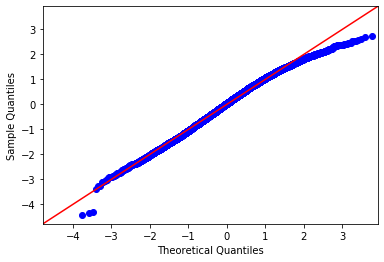

In [93]:
res_compet = y_pred_compet-y_test_compet # residuals
#print(res)
fig=sm.qqplot(res_compet,fit=True, line='45')

In [94]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model COMPETENCIA', MAE(y_pred_compet,y_test_compet))
print('RMSE of the model COMNPETENCIA', RMSE(y_pred_compet,y_test_compet))
print('MAPE of the model COMPETENCIA', MAPE(y_pred_compet,y_test_compet))
print('Accuracy of the model COMPETENCIA', 100-MAPE(y_pred_compet,y_test_compet))

MAE of the model COMPETENCIA 26.622032823929686
RMSE of the model COMNPETENCIA 32.58969511858864
MAPE of the model COMPETENCIA 20.36983296896983
Accuracy of the model COMPETENCIA 79.63016703103017


In [95]:
# Important variables COMPETENCIA

feature_list_competencia= list(df_t_competencia[covariates].columns)
# Get numerical feature importances
importances_competencia = list(RandomforestRegModel_competencia.feature_importances_)
# List of tuples with variable and importance
feature_importances_competencia = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_competencia, importances_competencia)]
# Sort the feature importances by most important first
feature_importances_competencia = sorted(feature_importances_competencia, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_COMPETEN_CIUDADA_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_competencia];

MOD_COMPETEN_CIUDADA_PUNT

Variable: INST_ORIGEN          Importance: 0.21
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.19
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.19
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.14
Variable: INST_CARACTER_ACADEMICO Importance: 0.1
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.09
Variable: ESTU_GENERO          Importance: 0.04
Variable: ESTU_METODO_PRGM     Importance: 0.03


**MOD_INGLES_PUNT**

In [96]:
df_t_ingles=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_ingles[var]=df_t_ingles[var].cat.codes

In [97]:
with pd.option_context('display.max_columns',500):
    display(df_t_ingles.head())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
955354,CC,COLOMBIA,0,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,4,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q3,Q3,Q1,Q3
955379,CC,COLOMBIA,0,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,0,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,BOGOTA,3,TÉCNICO PROFESIONAL,2,31,11001.0,BOGOTA,BOGOTA,3,0,11001,BOGOTÁ,BOGOTA,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
955390,CC,COLOMBIA,0,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,0,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,33,11001.0,BOGOTA,BOGOTA,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q3,Q4,Q3
955395,CC,COLOMBIA,1,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,4,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,31,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
955398,CC,COLOMBIA,0,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,15001.0,COLEGIO REAL DE MARES,0,0,0,0,1,0,0,0,CC,7,9,3,1,1,1,1,1,1106,UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMB...,TÉCNICA PROFESIONAL EN PROCESOS COMERCIALES Y ...,15001,TUNJA,5,TÉCNICO PROFESIONAL,1,47,15001.0,TUNJA,BOYACA,4,4,15001,TUNJA,BOYACA,15,153.0,54.0,193.5,92.0,180.0,84.0,159.0,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q3,Q3


In [98]:
X_train_ingles, X_test_ingles, y_train_ingles, y_test_ingles = train_test_split(df_t_ingles[covariates],
                                                    df_t_ingles['MOD_INGLES_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [99]:
print('X_train_ingles shape: ', X_train_ingles.shape)
print('X_test_ingles shape: ', X_test_ingles.shape)
print('y_train_ingles shape: ', y_train_ingles.shape)
print('y_test_ingles shape: ', y_test_ingles.shape)

X_train_ingles shape:  (36083, 8)
X_test_ingles shape:  (12028, 8)
y_train_ingles shape:  (36083,)
y_test_ingles shape:  (12028,)


In [100]:
RFR_ingles=RandomForestRegressor(random_state=1)
RFR_ingles

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [101]:
# The number of folds for cross validation cv=5
RFR_random_ingles=RandomizedSearchCV(estimator=RFR_ingles, param_distributions=grid_param, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [115]:
# Fit the RandomizedSearchCV with the features and labels
RFR_random_ingles.fit(df_t_ingles[covariates],df_t_ingles['MOD_INGLES_PUNT'])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 16.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [116]:
# Finally after the iterations and the number of cross validation folds print best parameters
print(RFR_random_ingles.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 10}


In [102]:
# Create the Regression model with Random Forest
RandomforestRegModel_ingles= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=10,max_features='auto',\
                                           min_samples_split=2, min_samples_leaf=10,\
                                           n_estimators=100)
# Train the model
RandomforestRegModel_ingles.fit(X_train_ingles, y_train_ingles)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
# Create the Regression model with Random Forest
#RandomforestRegModel_ingles= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
#RandomforestRegModel_ingles.fit(X_train_ingles, y_train_ingles)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [103]:
y_pred_ingles=RandomforestRegModel_ingles.predict(X_test_ingles)

In [104]:
#MOD_INGLES_PUNT
comparar_ingles=pd.DataFrame(y_pred_ingles, y_test_ingles)
comparar_ingles.head(20)

,0
MOD_INGLES_PUNT,
123.0,138.705783
156.0,158.318727
108.0,148.173003
165.0,160.056887
166.5,152.911639
172.5,137.335770
97.5,128.405797
127.5,151.043830
139.5,140.925369


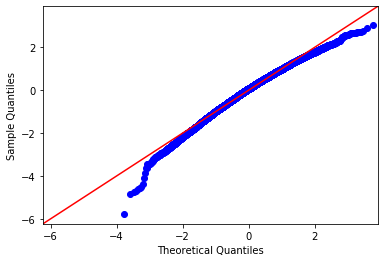

In [105]:
res_ingles = y_pred_ingles-y_test_ingles # residuals
#print(res)
fig=sm.qqplot(res_ingles,fit=True, line='45')

In [106]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model INGLES', MAE(y_pred_ingles,y_test_ingles))
print('RMSE of the model INGLES', RMSE(y_pred_ingles,y_test_ingles))
print('MAPE of the model INGLES', MAPE(y_pred_ingles,y_test_ingles))
print('Accuracy of the model INGLES', 100-MAPE(y_pred_ingles,y_test_ingles))

MAE of the model INGLES 22.577729519290738
RMSE of the model INGLES 28.434116833876892
MAPE of the model INGLES 15.776065806108944
Accuracy of the model INGLES 84.22393419389105


In [107]:
# Important variables INGLES

feature_list_ingles= list(df_t_ingles[covariates].columns)
# Get numerical feature importances
importances_ingles = list(RandomforestRegModel_ingles.feature_importances_)
# List of tuples with variable and importance
feature_importances_ingles = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_ingles, importances_ingles)]
# Sort the feature importances by most important first
feature_importances_ingles = sorted(feature_importances_ingles, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_INGLES_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_ingles];

MOD_INGLES_PUNT

Variable: FAMI_ESTRATOVIVIENDA Importance: 0.24
Variable: ESTU_NUCLEO_PREGRADO Importance: 0.23
Variable: INST_ORIGEN          Importance: 0.19
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.12
Variable: ESTU_METODO_PRGM     Importance: 0.07
Variable: INST_CARACTER_ACADEMICO Importance: 0.07
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.05
Variable: ESTU_GENERO          Importance: 0.03


**MOD_COMUNI_ESCRITA_PUNT**

In [108]:
df_t_escrita=df_sabertyt.copy()
for var in ['ESTU_GENERO','INST_ORIGEN','FAMI_TIENEAUTOMOVIL','FAMI_TIENELAVADORA','FAMI_TIENECOMPUTADOR','FAMI_TIENEINTERNET','FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONMADRE',\
            'FAMI_EDUCACIONPADRE','ESTU_METODO_PRGM','INST_CARACTER_ACADEMICO','ESTU_HORASSEMANATRABAJA','ESTU_ACTIVIDADREFUERZOGENERIC','ESTU_ACTIVIDADREFUERZOAREAS',\
            'ESTU_SIMULACROTIPOICFES','ESTU_PAGOMATRICULAPROPIO','ESTU_PAGOMATRICULAPADRES','ESTU_PAGOMATRICULACREDITO','ESTU_PAGOMATRICULABECA','ESTU_VALORMATRICULAUNIVERSIDAD',\
            'ESTU_PRGM_DEPARTAMENTO','ESTU_NUCLEO_PREGRADO']:
    df_t_escrita[var]=df_t_escrita[var].cat.codes

In [109]:
with pd.option_context('display.max_columns',500):
    display(df_t_escrita.head())

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,ESTU_COLE_TERMINO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_PAGOMATRICULABECA,ESTU_PAGOMATRICULACREDITO,ESTU_PAGOMATRICULAPADRES,ESTU_PAGOMATRICULAPROPIO,ESTU_SIMULACROTIPOICFES,ESTU_ACTIVIDADREFUERZOAREAS,ESTU_ACTIVIDADREFUERZOGENERIC,ESTU_TIPODOCUMENTOSB11,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_HORASSEMANATRABAJA,INST_COD_INSTITUCION,INST_NOMBRE_INSTITUCION,ESTU_PRGM_ACADEMICO,ESTU_PRGM_CODMUNICIPIO,ESTU_PRGM_MUNICIPIO,ESTU_PRGM_DEPARTAMENTO,ESTU_NIVEL_PRGM_ACADEMICO,ESTU_METODO_PRGM,ESTU_NUCLEO_PREGRADO,ESTU_INST_CODMUNICIPIO,ESTU_INST_MUNICIPIO,ESTU_INST_DEPARTAMENTO,INST_CARACTER_ACADEMICO,INST_ORIGEN,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_INGLES_PUNT,MOD_INGLES_DESEM,MOD_INGLES_PNAL,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,ESTU_ESTADOINVESTIGACION,PERIODO-X,PRUEBA,TIPO_PRUEBA,group_CUANTITATIVO,group_LECTURA,group_COMPETENCIA,group_INGLES,group_ESCRITA
955354,CC,COLOMBIA,0,1991-06-22 00:00:00,20161,EK201610110512,ESTUDIANTE,VALLE,76.0,CALI,76001.0,COLEGIO REPUBLICA DOMINICANA (IED) - SEDE PRIN...,4,0,0,0,1,0,0,0,CC,8,5,3,0,1,1,0,1,4109,INSTITUTO TECNICO NACIONAL DE COMERCIOSIMON RO...,TECNICA PROFESIONAL EN SALUD OCUPACIONAL,76001,CALI,29,TÉCNICO PROFESIONAL,2,46,76001.0,CALI,VALLE,3,4,76001,CALI,VALLE,76,136.5,34.0,145.5,45.0,148.5,47.0,120.0,-A1,17.0,156.0,3,53.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q3,Q3,Q1,Q3
955379,CC,COLOMBIA,0,1992-07-01,20161,EK201610028250,ESTUDIANTE,BOGOTA,11.0,BOGOTA,11001.0,I.E.D. ESCUELA NORMAL SUPERIOR MARIA AUXILIADORA,0,0,1,0,1,0,0,0,TI,8,5,2,1,1,1,0,1,4813,CORPORACION UNIFICADA NACIONAL DE EDUCACION SU...,TECNICA PROFESIONAL EN MANTENIMIENTO ELECTRONICO,11001,BOGOTA,3,TÉCNICO PROFESIONAL,2,31,11001.0,BOGOTA,BOGOTA,3,0,11001,BOGOTÁ,BOGOTA,11,192.0,92.0,187.5,89.0,199.5,96.0,181.5,A2,85.0,180.0,3,84.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q4,Q4,Q4,Q4
955390,CC,COLOMBIA,0,1992-10-08,20161,EK201610085857,ESTUDIANTE,META,50.0,VILLAVICENCIO,50001.0,COLEGIO CORAZONISTA,0,0,1,0,1,0,0,0,TI,5,1,4,1,1,1,1,1,3712,FUNDACION CENTRO DE INVESTIGACION DOCENCIA Y C...,TECNOLOGIA EN INDUSTRIAL,50001,VILLAVICENCIO,19,TECNOLOGÍA,2,33,11001.0,BOGOTA,BOGOTA,1,1,50001,VILLAVICENCIO,META,50,166.5,70.0,132.0,28.0,142.5,39.0,169.5,A2,76.0,165.0,3,67.0,PUBLICAR,20161,SaberTyT,Normal,Q4,Q2,Q3,Q4,Q3
955395,CC,COLOMBIA,1,1994-05-03,20161,EK201610021372,ESTUDIANTE,ATLANTICO,8.0,BARRANQUILLA,8001.0,PABLO VI,4,0,1,0,1,0,0,0,TI,8,7,2,0,1,1,0,1,3117,INSTITUCION UNIVERSITARIA ITSA-SOLEDAD,TECNOLOGIA EN AUTOMATIZACIÓN ELECTRÓNICA INDUS...,8758,SOLEDAD,2,TECNOLOGÍA,2,31,8758.0,SOLEDAD,ATLANTICO,2,4,8001,BARRANQUILLA,ATLANTICO,8,154.5,55.0,205.5,97.0,207.0,98.0,174.0,A2,80.0,205.5,4,99.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q4,Q4
955398,CC,COLOMBIA,0,1987-07-31,20161,EK201610063234,ESTUDIANTE,BOYACA,15.0,TUNJA,15001.0,COLEGIO REAL DE MARES,0,0,0,0,1,0,0,0,CC,7,9,3,1,1,1,1,1,1106,UNIVERSIDAD PEDAGOGICA Y TECNOLOGICA DE COLOMB...,TÉCNICA PROFESIONAL EN PROCESOS COMERCIALES Y ...,15001,TUNJA,5,TÉCNICO PROFESIONAL,1,47,15001.0,TUNJA,BOYACA,4,4,15001,TUNJA,BOYACA,15,153.0,54.0,193.5,92.0,180.0,84.0,159.0,A2,66.0,159.0,3,59.0,PUBLICAR,20161,SaberTyT,Normal,Q3,Q4,Q4,Q3,Q3


In [110]:
X_train_escrita, X_test_escrita, y_train_escrita, y_test_escrita = train_test_split(df_t_escrita[covariates],
                                                    df_t_escrita['MOD_COMUNI_ESCRITA_PUNT'], test_size=0.25,
                                                    random_state=1234)

In [111]:
print('X_train_escrita shape: ', X_train_escrita.shape)
print('X_test_escrita shape: ', X_test_escrita.shape)
print('y_train_escrita shape: ', y_train_escrita.shape)
print('y_test_escrita shape: ', y_test_escrita.shape)

X_train_escrita shape:  (36083, 8)
X_test_escrita shape:  (12028, 8)
y_train_escrita shape:  (36083,)
y_test_escrita shape:  (12028,)


In [112]:
RFR_escrita=RandomForestRegressor(random_state=1)
RFR_escrita

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [113]:
# The number of folds for cross validation cv=5
RFR_random_escrita=RandomizedSearchCV(estimator=RFR_escrita, param_distributions=grid_param, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)


In [129]:
# Fit the RandomizedSearchCV with the features and labels
RFR_random_escrita.fit(df_t_escrita[covariates],df_t_escrita['MOD_COMUNI_ESCRITA_PUNT'])

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed: 16.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [130]:
# Finally after the iterations and the number of cross validation folds print best parameters
print(RFR_random_escrita.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 8}


In [114]:
# Create the Regression model with Random Forest
#RandomforestRegModel_escrita= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
RandomforestRegModel_escrita= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=8,max_features='sqrt',\
                                           min_samples_split=2, min_samples_leaf=10,\
                                           n_estimators=100)
# Train the model
RandomforestRegModel_escrita.fit(X_train_escrita, y_train_escrita)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
# Create the Regression model with Random Forest
#RandomforestRegModel_escrita= RandomForestRegressor(bootstrap=True, criterion='mse',max_depth=6,max_features='auto')
# Train the model
#RandomforestRegModel_escrita.fit(X_train_escrita, y_train_escrita)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
y_pred_escrita=RandomforestRegModel_escrita.predict(X_test_escrita)

In [116]:
y_pred_escrita

array([148.79073096, 154.76520851, 153.6372841 , ..., 155.12861431,
       149.58198831, 151.96732719])

In [117]:
#MOD_COMUNI_ESCRITA_PUNT
comparar_escrita=pd.DataFrame(y_pred_escrita, y_test_escrita)
comparar_escrita.head(20)

,0
MOD_COMUNI_ESCRITA_PUNT,
178.5,148.790731
171.0,154.765209
156.0,153.637284
216.0,157.267132
154.5,149.399702
223.5,154.284463
157.5,145.900312
145.5,146.889967
159.0,144.001165


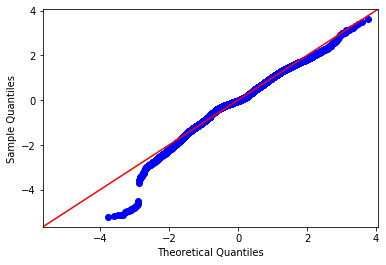

In [118]:
res_escrita = y_pred_escrita-y_test_escrita # residuals
#print(res)
fig=sm.qqplot(res_escrita,fit=True, line='45')

In [119]:
# Calculate MAE, RMSE, MAPE
print('MAE of the model escrita', MAE(y_pred_escrita,y_test_escrita))
print('RMSE of the model escrita', RMSE(y_pred_escrita,y_test_escrita))
print('MAPE of the model escrita', MAPE(y_pred_escrita,y_test_escrita))
print('Accuracy of the model escrita', 100-MAPE(y_pred_escrita,y_test_escrita))

MAE of the model escrita 22.48245831594563
RMSE of the model escrita 29.740644054000143
MAPE of the model escrita 15.896107532910246
Accuracy of the model escrita 84.10389246708975


In [120]:
# Important variables MOD_COMUNI_ESCRITA_PUNT

feature_list_escrita= list(df_t_escrita[covariates].columns)
# Get numerical feature importances
importances_escrita = list(RandomforestRegModel_escrita.feature_importances_)
# List of tuples with variable and importance
feature_importances_escrita = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_escrita, importances_escrita)]
# Sort the feature importances by most important first
feature_importances_escrita = sorted(feature_importances_escrita, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
print('MOD_COMUNI_ESCRITA_PUNT\n')
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_escrita];

MOD_COMUNI_ESCRITA_PUNT

Variable: ESTU_NUCLEO_PREGRADO Importance: 0.24
Variable: ESTU_GENERO          Importance: 0.16
Variable: ESTU_PRGM_DEPARTAMENTO Importance: 0.16
Variable: FAMI_ESTRATOVIVIENDA Importance: 0.15
Variable: INST_ORIGEN          Importance: 0.1
Variable: ESTU_VALORMATRICULAUNIVERSIDAD Importance: 0.08
Variable: INST_CARACTER_ACADEMICO Importance: 0.07
Variable: ESTU_METODO_PRGM     Importance: 0.04


In [121]:
feature_importances_razona=feature_importances

In [122]:
feature_importances_razona

[('INST_ORIGEN', 0.3),
 ('ESTU_NUCLEO_PREGRADO', 0.21),
 ('ESTU_PRGM_DEPARTAMENTO', 0.13),
 ('ESTU_GENERO', 0.09),
 ('INST_CARACTER_ACADEMICO', 0.09),
 ('FAMI_ESTRATOVIVIENDA', 0.08),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.08),
 ('ESTU_METODO_PRGM', 0.02)]

In [123]:
top_razona=feature_importances_razona[0:8]
top_razona

[('INST_ORIGEN', 0.3),
 ('ESTU_NUCLEO_PREGRADO', 0.21),
 ('ESTU_PRGM_DEPARTAMENTO', 0.13),
 ('ESTU_GENERO', 0.09),
 ('INST_CARACTER_ACADEMICO', 0.09),
 ('FAMI_ESTRATOVIVIENDA', 0.08),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.08),
 ('ESTU_METODO_PRGM', 0.02)]

In [124]:
top_razona=pd.DataFrame(top_razona)

In [125]:
top_razona

,0,1
0,INST_ORIGEN,0.30
1,ESTU_NUCLEO_PREGRADO,0.21
2,ESTU_PRGM_DEPARTAMENTO,0.13
3,ESTU_GENERO,0.09
4,INST_CARACTER_ACADEMICO,0.09
5,FAMI_ESTRATOVIVIENDA,0.08
6,ESTU_VALORMATRICULAUNIVERSIDAD,0.08
7,ESTU_METODO_PRGM,0.02


In [126]:
feature_importances_lectura

[('ESTU_NUCLEO_PREGRADO', 0.22),
 ('INST_ORIGEN', 0.21),
 ('FAMI_ESTRATOVIVIENDA', 0.18),
 ('ESTU_PRGM_DEPARTAMENTO', 0.15),
 ('INST_CARACTER_ACADEMICO', 0.09),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.08),
 ('ESTU_GENERO', 0.03),
 ('ESTU_METODO_PRGM', 0.02)]

In [127]:
top_lectura=feature_importances_lectura[0:8]


In [128]:
top_lectura=pd.DataFrame(top_lectura)
top_lectura

,0,1
0,ESTU_NUCLEO_PREGRADO,0.22
1,INST_ORIGEN,0.21
2,FAMI_ESTRATOVIVIENDA,0.18
3,ESTU_PRGM_DEPARTAMENTO,0.15
4,INST_CARACTER_ACADEMICO,0.09
5,ESTU_VALORMATRICULAUNIVERSIDAD,0.08
6,ESTU_GENERO,0.03
7,ESTU_METODO_PRGM,0.02


In [129]:
feature_importances_competencia

[('INST_ORIGEN', 0.21),
 ('FAMI_ESTRATOVIVIENDA', 0.19),
 ('ESTU_PRGM_DEPARTAMENTO', 0.19),
 ('ESTU_NUCLEO_PREGRADO', 0.14),
 ('INST_CARACTER_ACADEMICO', 0.1),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.09),
 ('ESTU_GENERO', 0.04),
 ('ESTU_METODO_PRGM', 0.03)]

In [130]:
top_competencia=feature_importances_competencia[0:8]
top_competencia

[('INST_ORIGEN', 0.21),
 ('FAMI_ESTRATOVIVIENDA', 0.19),
 ('ESTU_PRGM_DEPARTAMENTO', 0.19),
 ('ESTU_NUCLEO_PREGRADO', 0.14),
 ('INST_CARACTER_ACADEMICO', 0.1),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.09),
 ('ESTU_GENERO', 0.04),
 ('ESTU_METODO_PRGM', 0.03)]

In [131]:
top_competencia=pd.DataFrame(top_competencia)
top_competencia

,0,1
0,INST_ORIGEN,0.21
1,FAMI_ESTRATOVIVIENDA,0.19
2,ESTU_PRGM_DEPARTAMENTO,0.19
3,ESTU_NUCLEO_PREGRADO,0.14
4,INST_CARACTER_ACADEMICO,0.10
5,ESTU_VALORMATRICULAUNIVERSIDAD,0.09
6,ESTU_GENERO,0.04
7,ESTU_METODO_PRGM,0.03


In [132]:
feature_importances_ingles

[('FAMI_ESTRATOVIVIENDA', 0.24),
 ('ESTU_NUCLEO_PREGRADO', 0.23),
 ('INST_ORIGEN', 0.19),
 ('ESTU_PRGM_DEPARTAMENTO', 0.12),
 ('ESTU_METODO_PRGM', 0.07),
 ('INST_CARACTER_ACADEMICO', 0.07),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.05),
 ('ESTU_GENERO', 0.03)]

In [133]:
top_ingles=feature_importances_ingles[0:8]
top_ingles

[('FAMI_ESTRATOVIVIENDA', 0.24),
 ('ESTU_NUCLEO_PREGRADO', 0.23),
 ('INST_ORIGEN', 0.19),
 ('ESTU_PRGM_DEPARTAMENTO', 0.12),
 ('ESTU_METODO_PRGM', 0.07),
 ('INST_CARACTER_ACADEMICO', 0.07),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.05),
 ('ESTU_GENERO', 0.03)]

In [134]:
top_ingles=pd.DataFrame(top_ingles)
top_ingles

,0,1
0,FAMI_ESTRATOVIVIENDA,0.24
1,ESTU_NUCLEO_PREGRADO,0.23
2,INST_ORIGEN,0.19
3,ESTU_PRGM_DEPARTAMENTO,0.12
4,ESTU_METODO_PRGM,0.07
5,INST_CARACTER_ACADEMICO,0.07
6,ESTU_VALORMATRICULAUNIVERSIDAD,0.05
7,ESTU_GENERO,0.03


In [135]:
feature_importances_escrita

[('ESTU_NUCLEO_PREGRADO', 0.24),
 ('ESTU_GENERO', 0.16),
 ('ESTU_PRGM_DEPARTAMENTO', 0.16),
 ('FAMI_ESTRATOVIVIENDA', 0.15),
 ('INST_ORIGEN', 0.1),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.08),
 ('INST_CARACTER_ACADEMICO', 0.07),
 ('ESTU_METODO_PRGM', 0.04)]

In [136]:
top_escrita=feature_importances_escrita[0:8]
top_escrita

[('ESTU_NUCLEO_PREGRADO', 0.24),
 ('ESTU_GENERO', 0.16),
 ('ESTU_PRGM_DEPARTAMENTO', 0.16),
 ('FAMI_ESTRATOVIVIENDA', 0.15),
 ('INST_ORIGEN', 0.1),
 ('ESTU_VALORMATRICULAUNIVERSIDAD', 0.08),
 ('INST_CARACTER_ACADEMICO', 0.07),
 ('ESTU_METODO_PRGM', 0.04)]

In [137]:
top_escrita=pd.DataFrame(top_escrita)
top_escrita

,0,1
0,ESTU_NUCLEO_PREGRADO,0.24
1,ESTU_GENERO,0.16
2,ESTU_PRGM_DEPARTAMENTO,0.16
3,FAMI_ESTRATOVIVIENDA,0.15
4,INST_ORIGEN,0.10
5,ESTU_VALORMATRICULAUNIVERSIDAD,0.08
6,INST_CARACTER_ACADEMICO,0.07
7,ESTU_METODO_PRGM,0.04


In [138]:
#pd.concat([t1, t2, t3, t4, t5], ignore_index=True)
top_tyt=pd.concat([top_razona,top_lectura,top_competencia,top_ingles,top_escrita],ignore_index=True)
top_tyt

,0,1
0,INST_ORIGEN,0.30
1,ESTU_NUCLEO_PREGRADO,0.21
2,ESTU_PRGM_DEPARTAMENTO,0.13
3,ESTU_GENERO,0.09
4,INST_CARACTER_ACADEMICO,0.09
5,FAMI_ESTRATOVIVIENDA,0.08
6,ESTU_VALORMATRICULAUNIVERSIDAD,0.08
7,ESTU_METODO_PRGM,0.02
8,ESTU_NUCLEO_PREGRADO,0.22
9,INST_ORIGEN,0.21


In [139]:
#df.rename(columns={'A': 'a', 'C': 'c'}))
top_tyt.rename(columns={0: 'Variable', 1: 'Importance'}, inplace=True)
top_tyt

,Variable,Importance
0,INST_ORIGEN,0.30
1,ESTU_NUCLEO_PREGRADO,0.21
2,ESTU_PRGM_DEPARTAMENTO,0.13
3,ESTU_GENERO,0.09
4,INST_CARACTER_ACADEMICO,0.09
5,FAMI_ESTRATOVIVIENDA,0.08
6,ESTU_VALORMATRICULAUNIVERSIDAD,0.08
7,ESTU_METODO_PRGM,0.02
8,ESTU_NUCLEO_PREGRADO,0.22
9,INST_ORIGEN,0.21


In [140]:
top_tyt['Variable'].value_counts()

ESTU_GENERO                       5
FAMI_ESTRATOVIVIENDA              5
ESTU_PRGM_DEPARTAMENTO            5
ESTU_VALORMATRICULAUNIVERSIDAD    5
ESTU_NUCLEO_PREGRADO              5
INST_CARACTER_ACADEMICO           5
ESTU_METODO_PRGM                  5
INST_ORIGEN                       5
Name: Variable, dtype: int64

In [141]:
#CF_TOTAL.groupby(CF_TOTAL['CF']).agg({'COLLISION_ID':'count'})
top_tyt.groupby(top_tyt['Variable']).agg({'Importance':'mean'}).sort_values(['Importance'], ascending=False)

,Importance
Variable,
ESTU_NUCLEO_PREGRADO,0.208
INST_ORIGEN,0.202
FAMI_ESTRATOVIVIENDA,0.168
ESTU_PRGM_DEPARTAMENTO,0.150
INST_CARACTER_ACADEMICO,0.084
ESTU_VALORMATRICULAUNIVERSIDAD,0.076
ESTU_GENERO,0.070
ESTU_METODO_PRGM,0.036


In [142]:
print("Razonamiento Cuantitavio")
print("Pred Max: ", y_pred.max(), "Test Max", y_test.max())
print("Pred Min: ", y_pred.min(), "Test Min", y_test.min())
print('\n')

print("LECTURA_CRITICA")
print("Pred Max: ", y_pred_lect.max(), "Test Max", y_test_lect.max())
print("Pred Min: ", y_pred_lect.min(), "Test Min", y_test_lect.min())
print('\n')

print("COMPETENCIA CIUDADANA")
print("Pred Max: ", y_pred_compet.max(), "Test Max", y_test_compet.max())
print("Pred Min: ", y_pred_compet.min(), "Test Min", y_test_compet.min())
print('\n')

print("INGLES")
print("Pred Max: ", y_pred_ingles.max(), "Test Max", y_test_ingles.max())
print("Pred Min: ", y_pred_ingles.min(), "Test Min", y_test_ingles.min())
print('\n')

print("COMUNICACION ESCRITA")
print("Pred Max: ", y_pred_escrita.max(), "Test Max", y_test_escrita.max())
print("Pred Min: ", y_pred_escrita.min(), "Test Min", y_test_escrita.min())
print('\n')

Razonamiento Cuantitavio
Pred Max:  203.4842840472926 Test Max 300.0
Pred Min:  99.29507736127108 Test Min 57.0


LECTURA_CRITICA
Pred Max:  189.344706399711 Test Max 300.0
Pred Min:  119.48274778306737 Test Min 39.0


COMPETENCIA CIUDADANA
Pred Max:  180.22623998882952 Test Max 300.0
Pred Min:  117.18489806210525 Test Min 57.0


INGLES
Pred Max:  206.65469353076662 Test Max 300.0
Pred Min:  115.9608315658427 Test Min 72.0


COMUNICACION ESCRITA
Pred Max:  167.63930348410773 Test Max 300.0
Pred Min:  134.2371319041306 Test Min 46.5




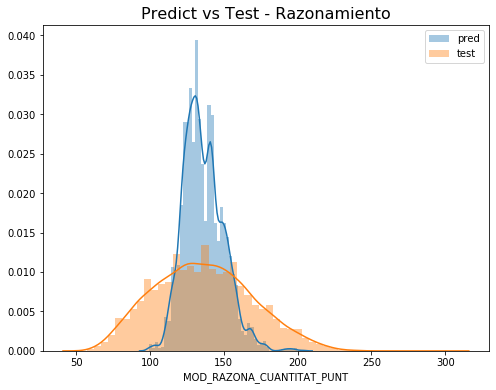

In [143]:
#Razonamiento
plt.figure(figsize=(8,6))

x = y_pred
y= y_test
sns.distplot(x, label='pred')
sns.distplot(y, label='test')

plt.title('Predict vs Test - Razonamiento', fontsize=16)
plt.legend()


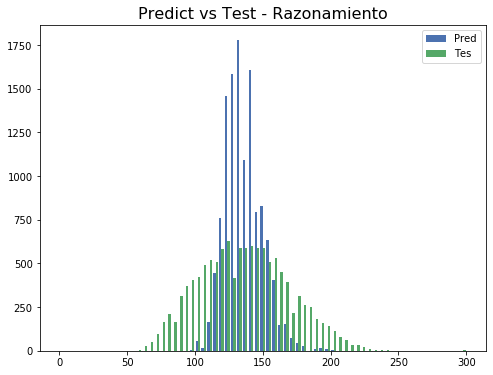

In [144]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-deep')

x = y_pred
y = y_test
bins = np.linspace(0, 300, 70)

plt.hist([x, y], bins, label=['Pred', 'Tes'])
plt.legend(loc='upper right')
plt.title('Predict vs Test - Razonamiento', fontsize=16)
plt.show()

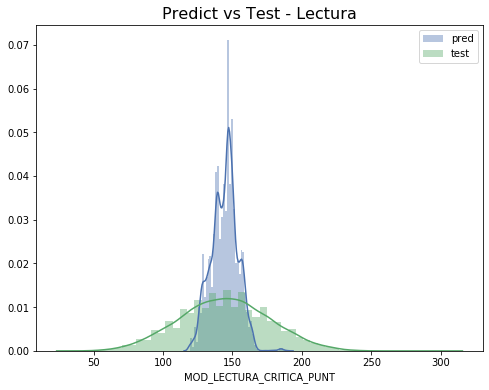

In [145]:
#lectura
plt.figure(figsize=(8,6))

x = y_pred_lect
y= y_test_lect
sns.distplot(x, label='pred')
sns.distplot(y, label='test')

plt.title('Predict vs Test - Lectura', fontsize=16)
plt.legend()

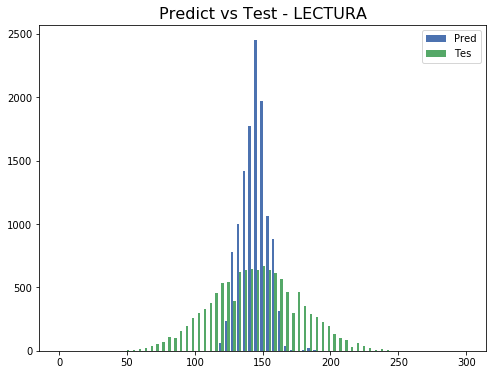

In [146]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-deep')

x = y_pred_lect
y = y_test_lect
bins = np.linspace(0, 300, 70)

plt.hist([x, y], bins, label=['Pred', 'Tes'])
plt.legend(loc='upper right')
plt.title('Predict vs Test - LECTURA', fontsize=16)
plt.show()

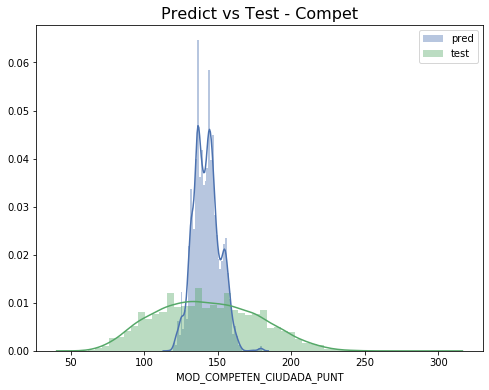

In [147]:
#Competencia
plt.figure(figsize=(8,6))

x = y_pred_compet
y= y_test_compet
sns.distplot(x, label='pred')
sns.distplot(y, label='test')

plt.title('Predict vs Test - Compet', fontsize=16)
plt.legend()

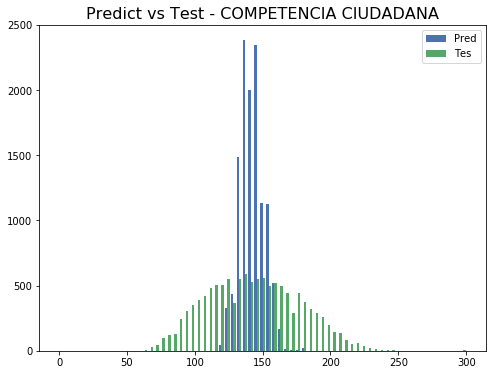

In [148]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-deep')

x = y_pred_compet
y = y_test_compet
bins = np.linspace(0, 300, 70)

plt.hist([x, y], bins, label=['Pred', 'Tes'])
plt.legend(loc='upper right')
plt.title('Predict vs Test - COMPETENCIA CIUDADANA', fontsize=16)
plt.show()

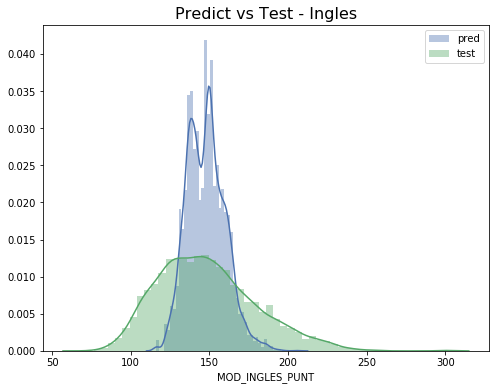

In [149]:
#Ingles
plt.figure(figsize=(8,6))

x = y_pred_ingles
y= y_test_ingles
sns.distplot(x, label='pred')
sns.distplot(y, label='test')

plt.title('Predict vs Test - Ingles', fontsize=16)
plt.legend()

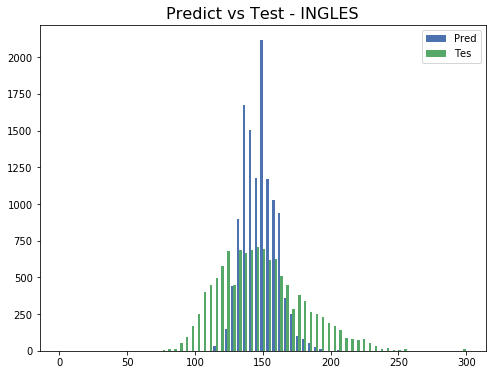

In [150]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-deep')

x = y_pred_ingles
y = y_test_ingles
bins = np.linspace(0, 300, 70)

plt.hist([x, y], bins, label=['Pred', 'Tes'])
plt.legend(loc='upper right')
plt.title('Predict vs Test - INGLES', fontsize=16)
plt.show()

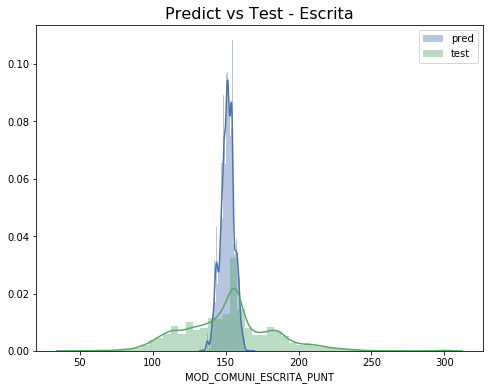

In [151]:
#Escrita
plt.figure(figsize=(8,6))

x = y_pred_escrita
y= y_test_escrita
sns.distplot(x, label='pred')
sns.distplot(y, label='test')

plt.title('Predict vs Test - Escrita', fontsize=16)
plt.legend()

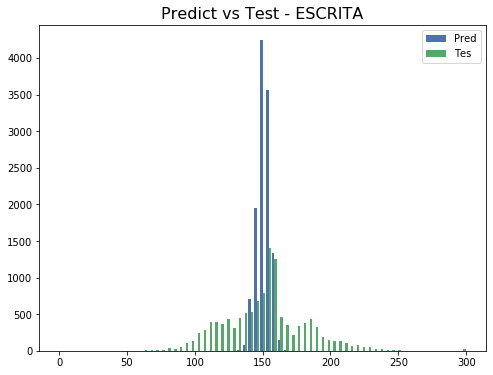

In [152]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-deep')

x = y_pred_escrita
y = y_test_escrita
bins = np.linspace(0, 300, 70)

plt.hist([x, y], bins, label=['Pred', 'Tes'])
plt.legend(loc='upper right')
plt.title('Predict vs Test - ESCRITA', fontsize=16)
plt.show()

In [177]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: joblib in c:\users\margu\anaconda3\envs\case_1.2_var2\lib\site-packages (0.15.1)



In [153]:
from sklearn.externals import joblib
joblib.dump(RandomforestRegModel, 'tyt-razonamiento cuantitativo-model-random-forest.joblib')

['tyt-razonamiento cuantitativo-model-random-forest.joblib']

In [154]:
joblib.dump(RandomforestRegModel_lectura, 'tyt-lectura critica-model-random-forest.joblib')

['tyt-lectura critica-model-random-forest.joblib']

In [155]:
joblib.dump(RandomforestRegModel_competencia, 'tyt-competencia ciudadana-model-random-forest.joblib')

['tyt-competencia ciudadana-model-random-forest.joblib']

In [156]:
joblib.dump(RandomforestRegModel_ingles, 'tyt-ingles-model-random-forest.joblib')

['tyt-ingles-model-random-forest.joblib']

In [157]:
joblib.dump(RandomforestRegModel_escrita, 'tyt-comunicacion escrita-model-random-forest.joblib')

['tyt-comunicacion escrita-model-random-forest.joblib']

In [163]:
print('The scikit-learn version is {}.'.format(scikit.learn.__version__))

NameError: name 'scikit' is not defined

In [165]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

NameError: name 'sklearn' is not defined

In [166]:
sklearn.__version__

NameError: name 'sklearn' is not defined

In [167]:
conda list scikit

# packages in environment at C:\Users\margu\anaconda3\envs\case_1.2_var2:
Note: you may need to restart the kernel to use updated packages.
#
# Name                    Version                   Build  Channel

scikit-learn              0.22.1           py38h6288b17_0  
scikit-surprise           1.1.1            py38h40bdaab_0    conda-forge
